In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df_sleep = pd.read_csv("processed_student_sleep.csv")


Saving processed_student_sleep.csv to processed_student_sleep (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df_public = pd.read_csv("processed_bhealth.csv")


Saving processed_bhealth.csv to processed_bhealth (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df_forms = pd.read_csv("processed_google_forms.csv")

Saving processed_google_forms.csv to processed_google_forms.csv


Exploratory Data Analysis

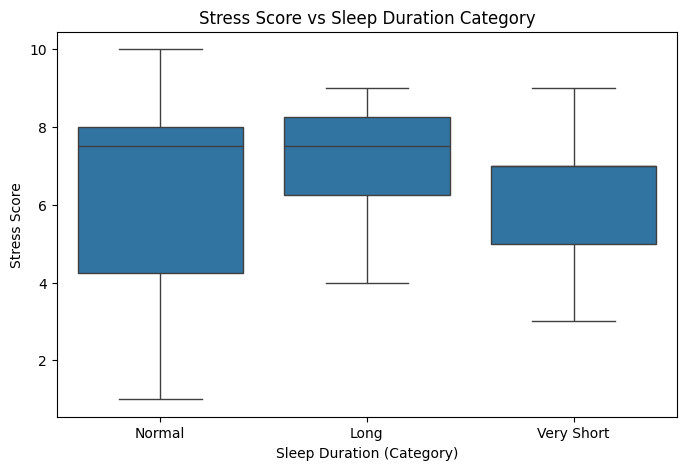

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_forms, x="sleep_bucket", y="stress_level")
plt.title("Stress Score vs Sleep Duration Category")
plt.xlabel("Sleep Duration (Category)")
plt.ylabel("Stress Score")
plt.show()

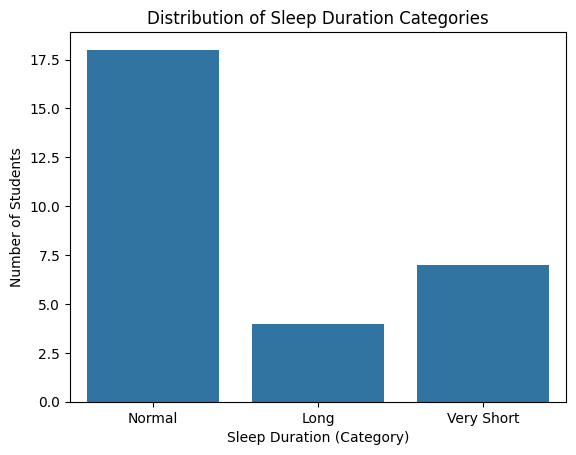

In [ ]:
sns.countplot(data=df_forms, x="sleep_bucket")
plt.title("Distribution of Sleep Duration Categories")
plt.xlabel("Sleep Duration (Category)")
plt.ylabel("Number of Students")
plt.show()


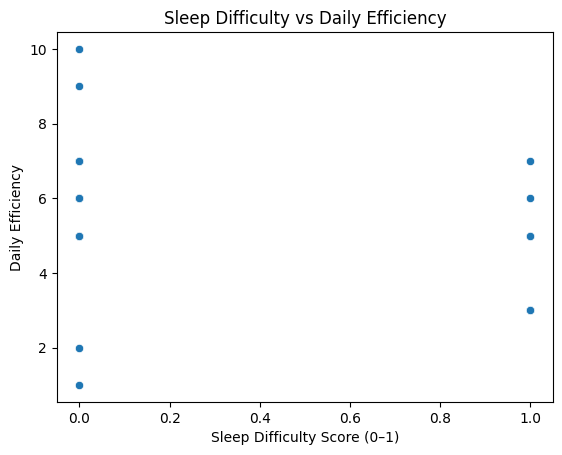

In [ ]:
sns.scatterplot(data=df_forms, x="sleep_difficulty_score", y="efficiency_level")
plt.title("Sleep Difficulty vs Daily Efficiency")
plt.xlabel("Sleep Difficulty Score (0–1)")
plt.ylabel("Daily Efficiency")
plt.show()


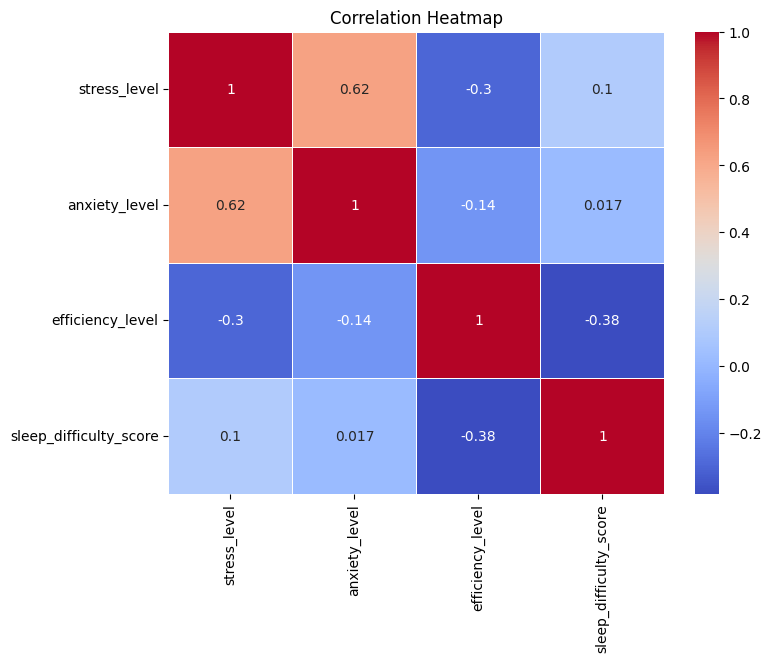

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_forms[["stress_level", "anxiety_level", "efficiency_level", "sleep_difficulty_score"]].corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()


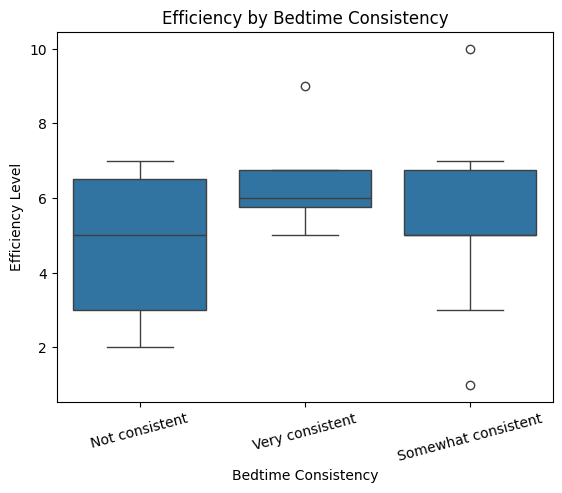

In [ ]:
sns.boxplot(data=df_forms, x="bedtime_consistency", y="efficiency_level")
plt.title("Efficiency by Bedtime Consistency")
plt.xlabel("Bedtime Consistency")
plt.ylabel("Efficiency Level")
plt.xticks(rotation=15)
plt.show()


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

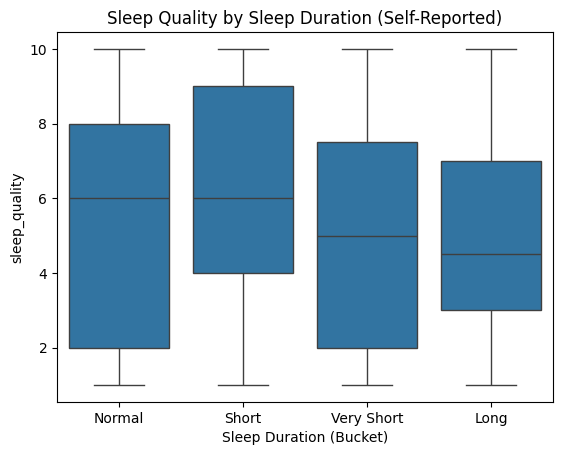

In [ ]:
sns.boxplot(data=df_sleep, x="sleep_bucket", y="sleep_quality")
plt.title("Sleep Quality by Sleep Duration (Self-Reported)")
plt.xlabel("Sleep Duration (Bucket)")
plt.ylabel


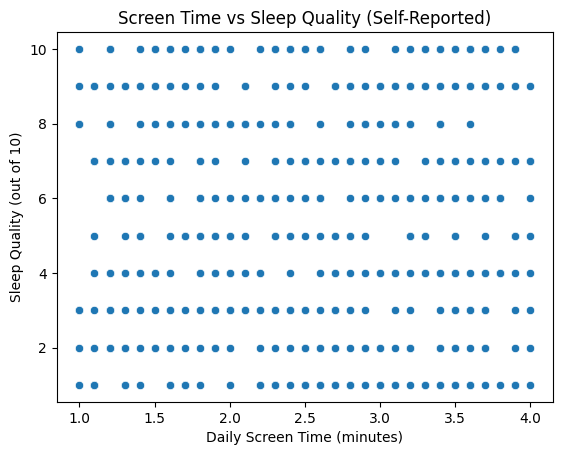

In [ ]:
sns.scatterplot(data=df_sleep, x="screen_time", y="sleep_quality")
plt.title("Screen Time vs Sleep Quality (Self-Reported)")
plt.xlabel("Daily Screen Time (minutes)")
plt.ylabel("Sleep Quality (out of 10)")
plt.show()


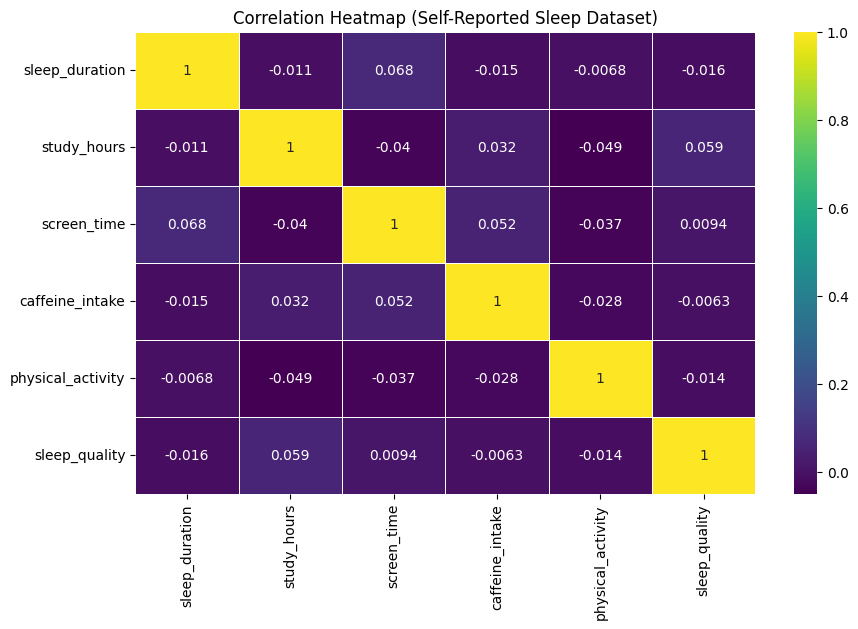

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_sleep[[
        "sleep_duration", "study_hours", "screen_time", "caffeine_intake",
        "physical_activity", "sleep_quality"
    ]].corr(),
    annot=True,
    cmap="viridis",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Self-Reported Sleep Dataset)")
plt.show()


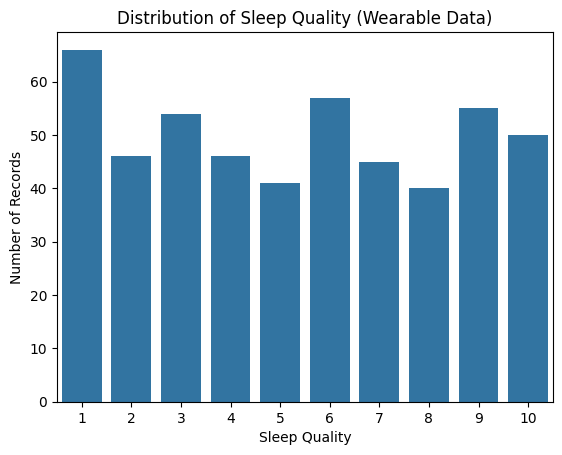

In [ ]:
sns.countplot(data=df_public, x="sleep_quality")
plt.title("Distribution of Sleep Quality (Wearable Data)")
plt.xlabel("Sleep Quality")
plt.ylabel("Number of Records")
plt.show()

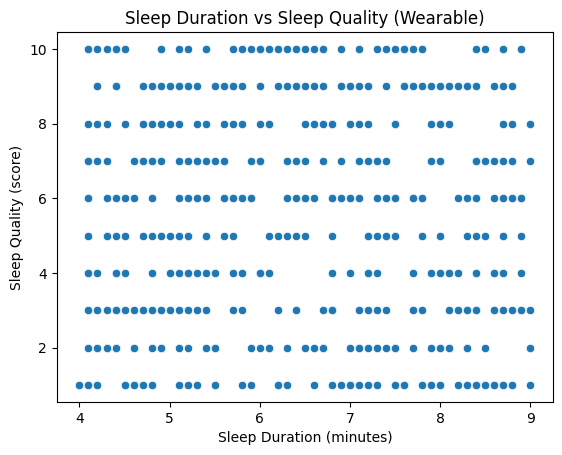

In [ ]:
sns.scatterplot(data=df_public, x="sleep_duration", y="sleep_quality")
plt.title("Sleep Duration vs Sleep Quality (Wearable)")
plt.xlabel("Sleep Duration (minutes)")
plt.ylabel("Sleep Quality (score)")
plt.show()

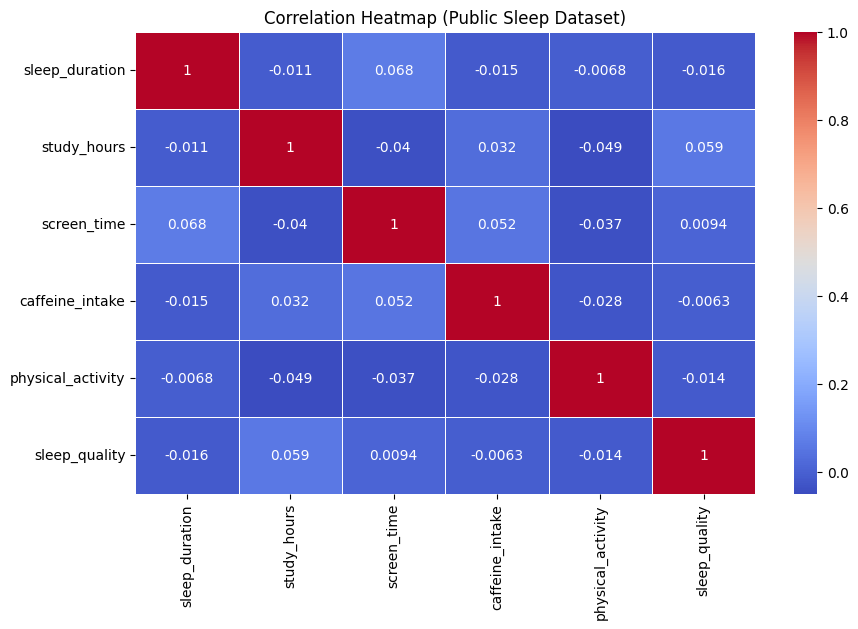

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_public[[
        "sleep_duration", "study_hours", "screen_time",
        "caffeine_intake", "physical_activity", "sleep_quality"
    ]].corr(),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Public Sleep Dataset)")
plt.show()


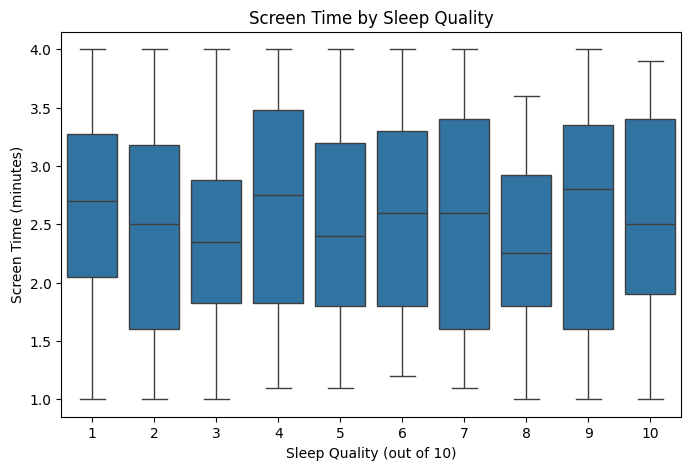

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_public, x="sleep_quality", y="screen_time")
plt.title("Screen Time by Sleep Quality")
plt.xlabel("Sleep Quality (out of 10)")
plt.ylabel("Screen Time (minutes)")
plt.show()


Hypotesis Testing
Does Sleep Duration Affect Stress Level?

In [ ]:

from scipy.stats import f_oneway

# Prepare groups
sleep_groups = df_forms["sleep_bucket"].unique()
groups = [df_forms[df_forms["sleep_bucket"] == cat]["stress_level"] for cat in sleep_groups]

# Run ANOVA
f_stat, p_val = f_oneway(*groups)

print("Sleep Duration vs Stress")
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant result: Sleep duration category affects stress in university students.")
else:
    print("Not significant: No difference in stress by sleep category.")

Sleep Duration vs Stress
F-statistic: 0.1525532605312477
P-value: 0.85927599895561
Not significant: No difference in stress by sleep category.


Does caffein intake effect sleep quality?

In [ ]:

from scipy.stats import pearsonr

corr, p_val = pearsonr(df_sleep["caffeine_intake"], df_sleep["sleep_quality"])

print("Pearson Correlation – Caffeine vs Sleep Quality")
print("Correlation Coefficient:", corr)
print("P-value:", p_val)

if p_val < 0.05:
    print("Significant correlation found.")
else:
    print("No significant correlation.")


Pearson Correlation – Caffeine vs Sleep Quality
Correlation Coefficient: -0.006271512735304744
P-value: 0.888750322468221
No significant correlation.


Is there a relationship between sleep quality and screen time?

In [ ]:

corr2, p_val2 = pearsonr(df_sleep["screen_time"], df_sleep["sleep_quality"])

print("\nPearson Correlation – Screen Time vs Sleep Quality")
print("Correlation Coefficient:", corr2)
print("P-value:", p_val2)

if p_val2 < 0.05:
    print(" Significant correlation found.")
else:
    print(" No significant correlation.")



Pearson Correlation – Screen Time vs Sleep Quality
Correlation Coefficient: 0.009410629326033457
P-value: 0.8337410075040855
 No significant correlation.


Physical Activity vs Sleep Quality

In [ ]:
from scipy.stats import pearsonr


corr, p_val = pearsonr(df_sleep["physical_activity"], df_sleep["sleep_quality"])

print("\nPearson Correlation – Physical Activity vs Sleep Quality")
print("Correlation Coefficient:", corr)
print("P-value:", p_val)

if p_val < 0.05:
    print(" Significant correlation found.")
else:
    print(" No significant correlation.")



Pearson Correlation – Physical Activity vs Sleep Quality
Correlation Coefficient: -0.013508830985428627
P-value: 0.7631671692880456
 No significant correlation.


After carefully examining the relationship between multiple sleep variables and well being indicators we come to the conclusion that there is not a significant correlation between sleep patterns and well-being indicators,which results in us being unable to reject the null hypothesis.